
### Google PlayStore Android App Data. (2.3 Million+ App Data)
- Context While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- Content Each app (row) has values for catergory, rating, size, and more.

- Acknowledgements This information is scraped from the Google Play Store. This app information would not be available without it.

Inspiration The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!
- Backup repo: https://github.com/gauthamp10/Google-Playstore-Dataset

In [1]:
#importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




In [2]:
#importing Data
df=pd.read_csv('googleplaystore.csv')

In [3]:
# Showing Data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


In [6]:
# calculating null values
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### Observations
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',   'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',   'Android Ver'
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
'Size', 'Installs', 'Price'

In [8]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [10]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [14]:
# converting whole size column to bytes
def convert_size(Size):
    if isinstance(Size, str):
        if "k" in Size:
            return float(Size.replace('k'," "))*1024
        elif 'M' in Size:
            return float(Size.replace('M'," "))*1024*1024
        elif 'Varies with device' in Size:
            return np.nan
    return Size
df['Size']=df['Size'].apply(convert_size)

In [16]:
## convert size column to mega bytes
df['Size']=df['Size'].apply(lambda x: x/1024/1024 if x>1024 else x)
# change name of size column to size in MB
df.rename(columns={'Size':'Size(MB)'},inplace=True)   


In [17]:
df.head()

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].str.replace(',','')

In [20]:
# changing data type

df['Installs']=df['Installs'].astype(int)

In [21]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [22]:
df['Price']=df['Price'].str.replace('$','')

In [23]:
df['Price']=df['Price'].astype(float)

In [24]:
df['Price'].dtype

dtype('float64')

In [26]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [27]:
df['Type']=df['Type'].fillna('Free')

In [29]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [30]:

df['Content Rating']=df['Content Rating'].str.replace('Adults only 18+','Adults')

In [31]:
df['Content Rating']=df['Content Rating'].str.replace('Everyone 10+','Teen')

In [32]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Adults', 'Unrated'],
      dtype=object)

In [33]:
df.head()

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [35]:
df.describe()

,Rating,Reviews,Size(MB),Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588679,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [36]:
#replace null values in rating column with mean
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

In [37]:
df['Category'].fillna(df['Category'].mode()[0],inplace=True)

In [38]:
df['Genres'].fillna(df['Genres'].mode()[0],inplace=True)

In [40]:
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Teen,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Teen,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,38.0,10000000,Free,0.00,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device


In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.shape

(10358, 13)

In [43]:
df.head()

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [44]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(MB)', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## INSIGHTS


### Top 10 categories with most numbers of apps

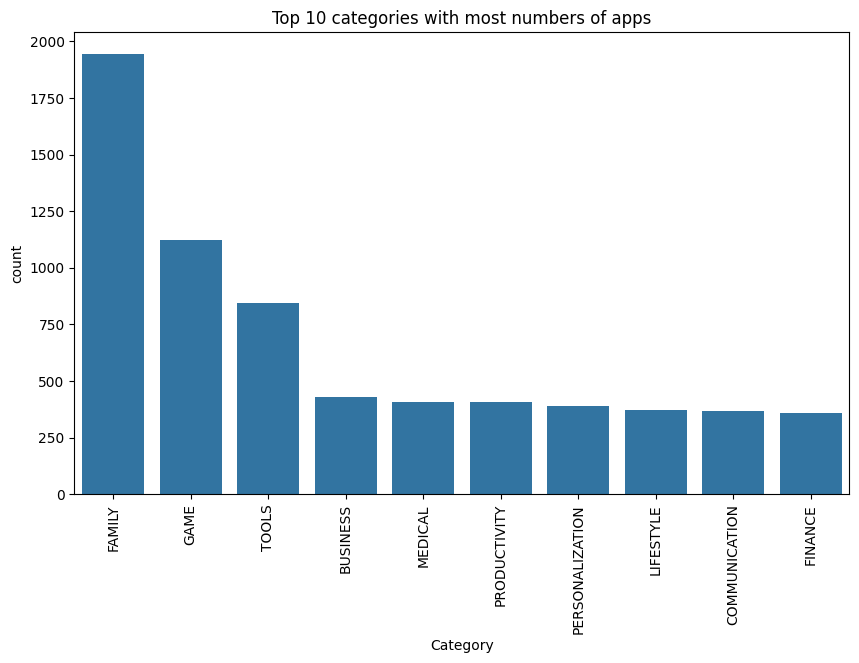

In [45]:

plt.figure(figsize=(10,6))
sns.countplot(x='Category',data=df,order=df['Category'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 categories with most numbers of apps')
plt.show()


### Top 10 apps in social category with most numbers of installs

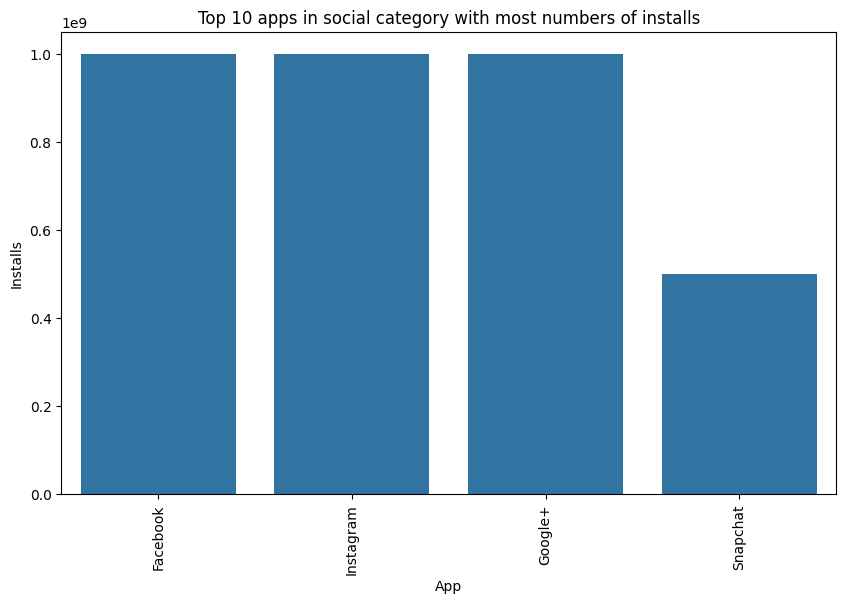

In [69]:

plt.figure(figsize=(10,6))
sns.barplot(x='App',y='Installs',data=df[df['Category']=='SOCIAL'].sort_values(by='Installs',ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('Top 10 apps in social category with most numbers of installs')
plt.show()


### Which category has the highest number of apps


In [49]:

df['Category'].value_counts().head(10)




Category
FAMILY             1944
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

### category has the highest number of Installs

In [50]:


df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)


Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452771915
FAMILY                10041693505
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

### Category with the highest number of reviews

In [51]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)


Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771988
TOOLS               273185044
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75193163
Name: Reviews, dtype: int64

### Category with highest average Rating

In [52]:

df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EDUCATION              4.374550
EVENTS                 4.363105
ART_AND_DESIGN         4.350378
BOOKS_AND_REFERENCE    4.311523
PERSONALIZATION        4.305253
PARENTING              4.281919
GAME                   4.277521
BEAUTY                 4.260503
HEALTH_AND_FITNESS     4.251394
SOCIAL                 4.246766
Name: Rating, dtype: float64

### Free vs Paid

In [56]:
px.bar(x=df['Type']== 'Paid',y=df['Installs'],labels={'x':'Type','y':'Installs'},title='Paid vs Free Apps')

<Axes: xlabel='Installs', ylabel='Price'>

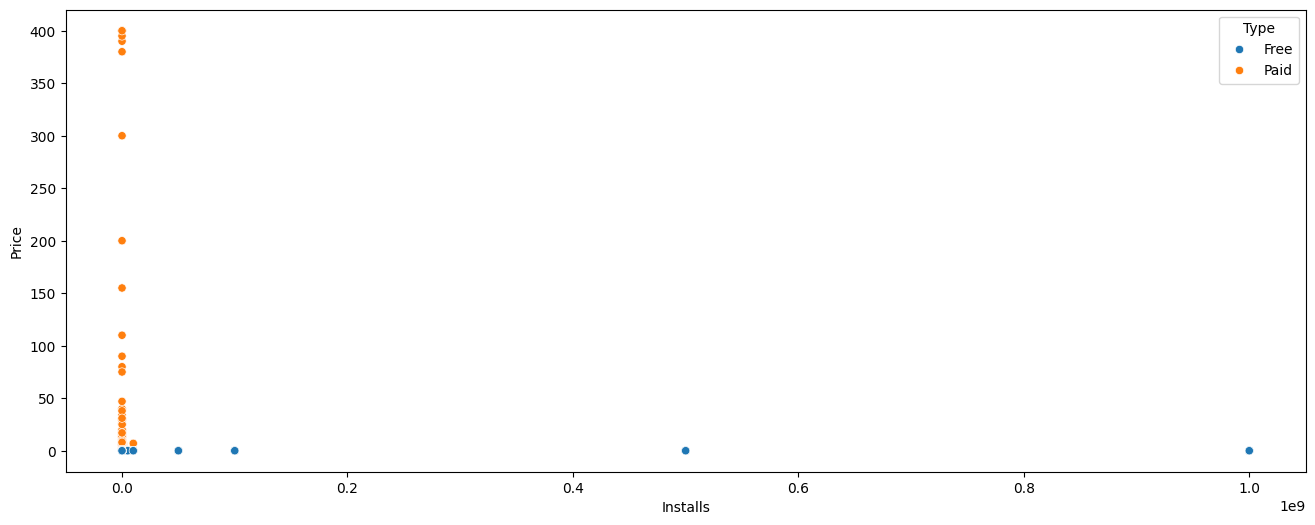

In [57]:
# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

### How many apps are there in Everyone content rating

In [62]:

df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1502
TOOLS                   835
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         320
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     201
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           61
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

### Top 5 rated paid apps

<Axes: xlabel='App', ylabel='Rating'>

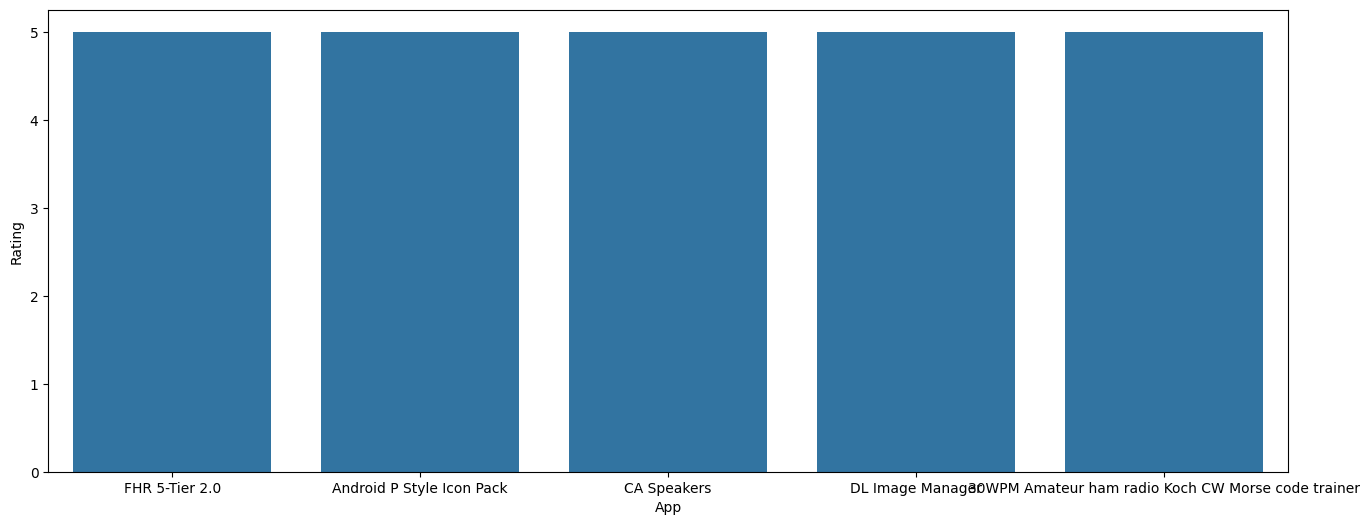

In [63]:

plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [64]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2271,FHR 5-Tier 2.0,MEDICAL,5.0,2,1.2,500,Paid,2.99,Everyone,Medical,"December 16, 2015",1.0,4.0 and up
4477,Android P Style Icon Pack,PERSONALIZATION,5.0,1,60.0,100,Paid,0.99,Everyone,Personalization,"June 16, 2018",1.0,4.1 and up
7100,CA Speakers,LIFESTYLE,5.0,12,1.2,100,Paid,0.99,Teen,Lifestyle,"March 25, 2014",1.0,3.0 and up
8526,DL Image Manager,PRODUCTIVITY,5.0,2,1.7,10,Paid,0.99,Everyone,Productivity,"July 29, 2018",1.0.5,4.0 and up
8018,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3.7,10,Paid,1.49,Everyone,Education,"May 18, 2018",2.0.2,2.1 and up


### Top 5 Paid apps with highest number of reviews

<Axes: xlabel='App', ylabel='Reviews'>

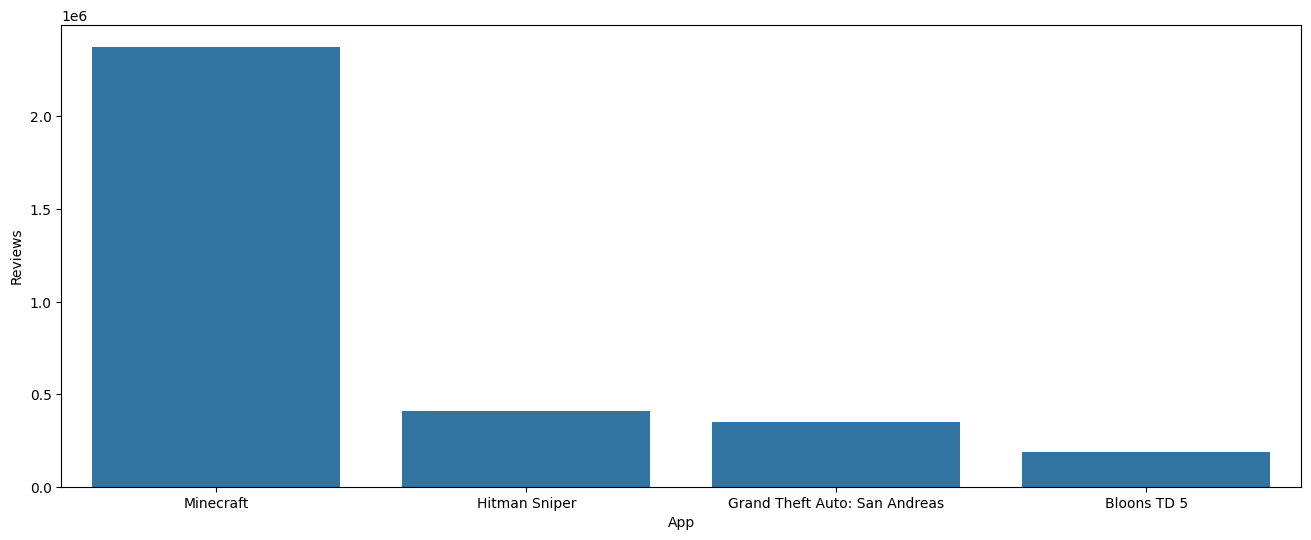

In [65]:

plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot